## Hand Tracking using Opencv and Mediapipe

Importing liberaries

In [17]:
import cv2
import mediapipe as mp
import time
import matplotlib.image as mpimg # image module for image reading

In [18]:
mpHands=mp.solutions.hands
hands=mpHands.Hands()
mpDraw=mp.solutions.drawing_utils

Above line of code is used for detecting the palm from image 

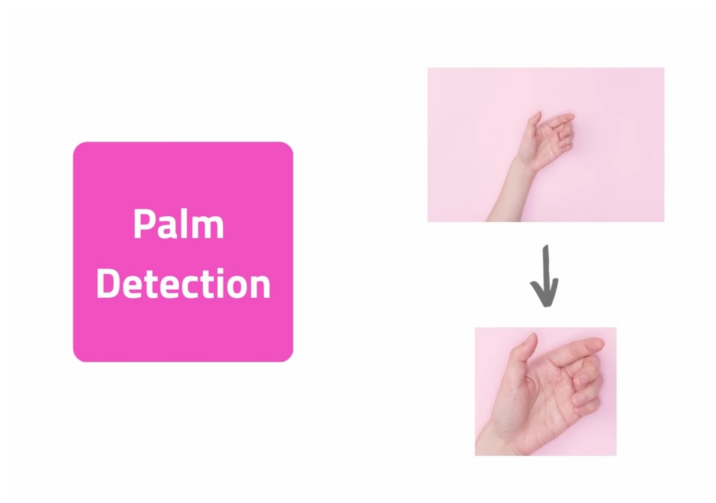

In [19]:
img2 = mpimg.imread("cropped palm.jpg")
plt.figure(figsize=(16,9))
plt.axis("off")
plt.imshow(img2)
plt.show()

In [20]:
from IPython.display import Image
Image(url= "https://google.github.io/mediapipe/images/mobile/hand_landmarks.png")

In [21]:
pTime=0
cTime=0

In [25]:
cap=cv2.VideoCapture(0) # you can change the parameter value if you have more than 1 webcam
while True:
    success, img =cap.read()
    imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    results=hands.process(imgRGB)
    #print(results.multi_hand_landmarks)
    if results.multi_hand_landmarks:
        for handlms in results.multi_hand_landmarks:
            for id, lm in enumerate(handlms.landmark):
                h,w,c=img.shape
                cx,cy=int(lm.x*w),int(lm.y*h)
                #print(id,cx,cy)
                if id==4:
                    cv2.circle(img,(cx,cy),5,(255,0,0),cv2.FILLED)
            mpDraw.draw_landmarks(img,handlms,mpHands.HAND_CONNECTIONS)
    cTime=time.time()
    fps=1/(cTime-pTime)
    pTime=cTime
    cv2.putText(img,str(int(fps)),(10,70),cv2.FONT_HERSHEY_PLAIN,3,(255,0,255),3)
    cv2.imshow('Image',img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # press q for exit make sure your caps lock must be off
        break
cap.release()
cv2.destroyAllWindows()